In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mysql.connector
import seaborn as sns

In [5]:
df=pd.read_csv('../csv_data/cleaned_sales_data.csv')
df.head()

,id,date,price_per_unit,units_sold,total_revenue
0,1,2023-01-01,50.5466,0,0.000
1,2,2023-01-02,52.1932,0,0.000
2,3,2023-01-03,49.0970,9,441.873
3,4,2023-01-04,52.6075,0,0.000
4,5,2023-01-05,50.1827,0,0.000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              736 non-null    int64  
 1   date            736 non-null    object 
 2   price_per_unit  736 non-null    float64
 3   units_sold      736 non-null    int64  
 4   total_revenue   736 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 28.9+ KB


In [7]:
df.describe()

,id,price_per_unit,units_sold,total_revenue
count,736.000000,736.000000,736.00000,736.000000
mean,368.500000,49.838109,52.52038,2169.491039
std,212.609188,7.467853,66.29743,2625.978438
min,1.000000,35.529400,0.00000,0.000000
25%,184.750000,42.849725,0.00000,0.000000
50%,368.500000,49.728750,4.00000,199.008200
75%,552.250000,57.065550,107.00000,4588.365050
max,736.000000,61.895700,257.00000,9180.631100


### Using Boxplot to check for outliers

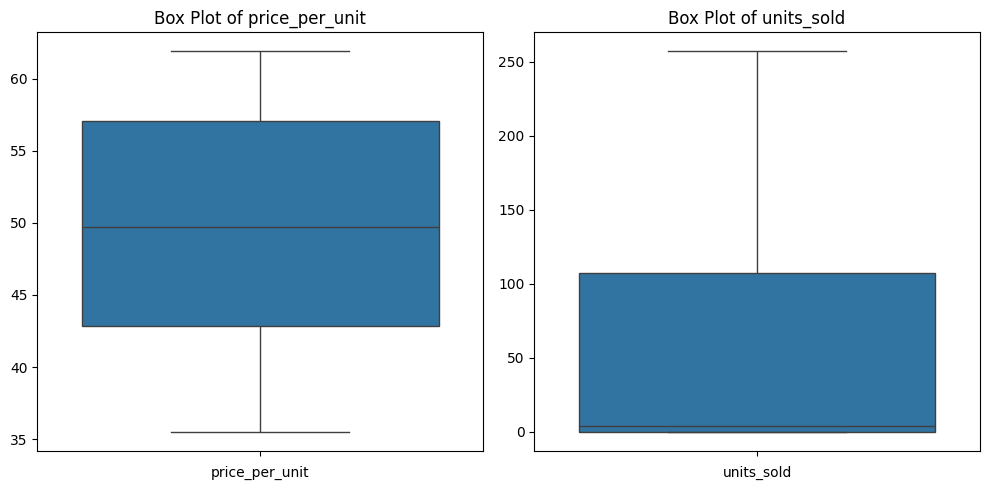

In [11]:

numerical_cols = ['price_per_unit', 'units_sold']


plt.figure(figsize=(10, 5))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel('')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


### For Price per Unit

The data appears to have no significant outliers, as all points are within the whiskers.

The distribution is fairly symmetric, with the median around 50.

### For Units Sold

No visible outliers, as all data points lie within the whiskers.

The distribution is slightly skewed, with many data points concentrated towards the lower end of the range.

In [12]:
df.duplicated().sum()

np.int64(0)

In [14]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.weekday




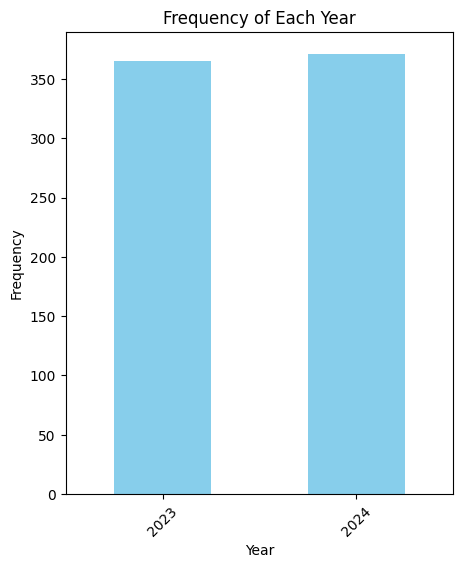

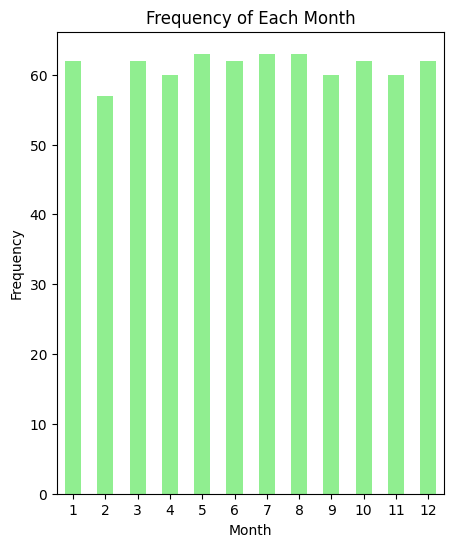

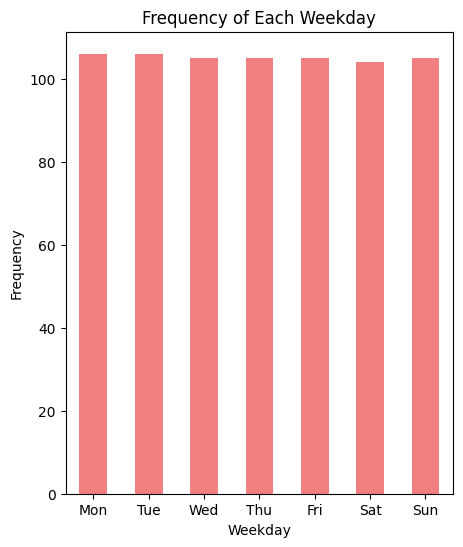

In [17]:
plt.figure(figsize=(5, 6))
df['year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Frequency of Each Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(5, 6))
df['month'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Frequency of Each Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


plt.figure(figsize=(5, 6))
df['weekday'].value_counts().sort_index().plot(kind='bar', color='lightcoral')
plt.title('Frequency of Each Weekday')
plt.xlabel('Weekday')
plt.ylabel('Frequency')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.show()

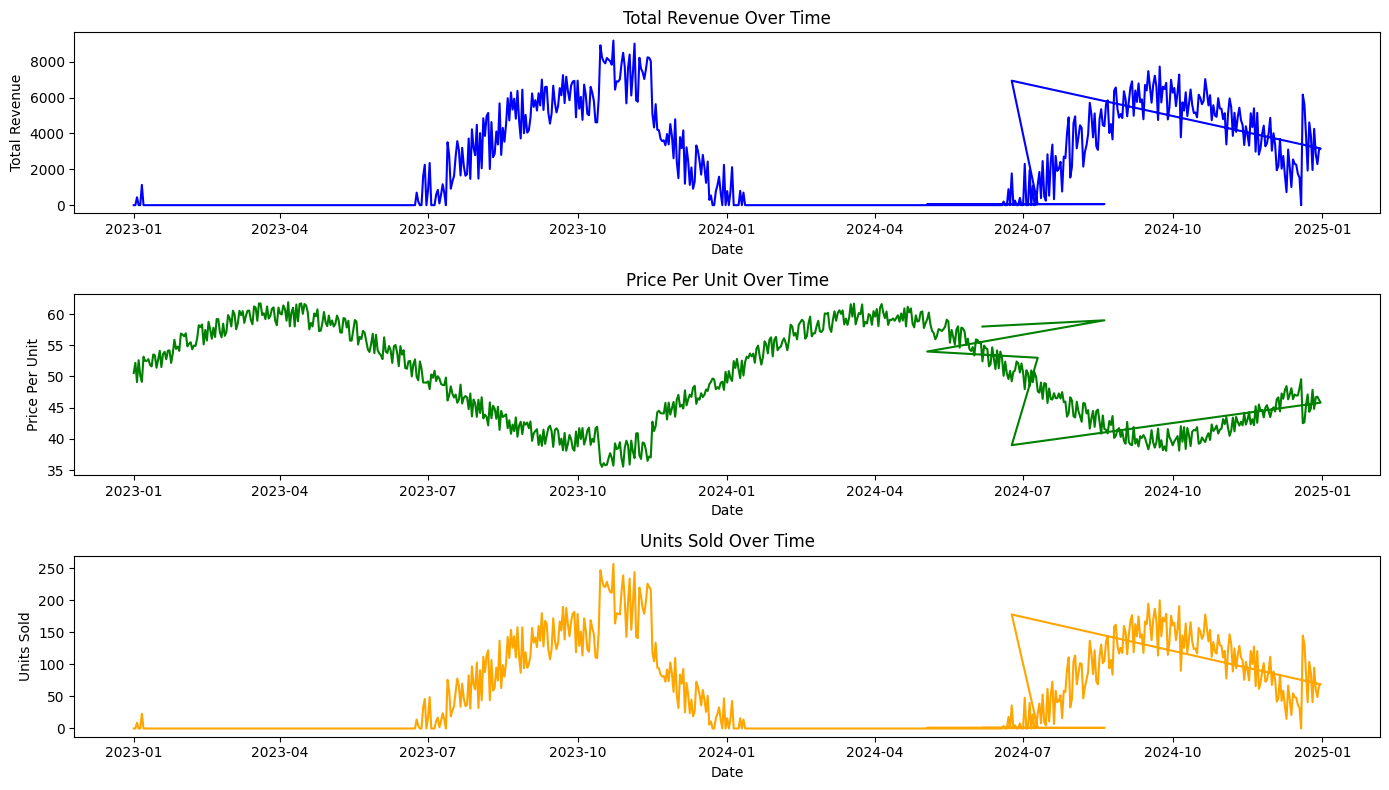

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose




df.set_index('date', inplace=True)

plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(df['total_revenue'], color='blue', label='Total Revenue')
plt.title('Total Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')

plt.subplot(3, 1, 2)
plt.plot(df['price_per_unit'], color='green', label='Price Per Unit')
plt.title('Price Per Unit Over Time')
plt.xlabel('Date')
plt.ylabel('Price Per Unit')

plt.subplot(3, 1, 3)
plt.plot(df['units_sold'], color='orange', label='Units Sold')
plt.title('Units Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')

plt.tight_layout()
plt.show()



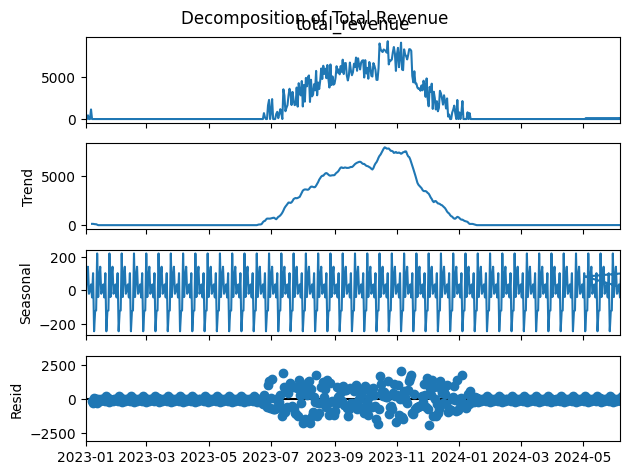

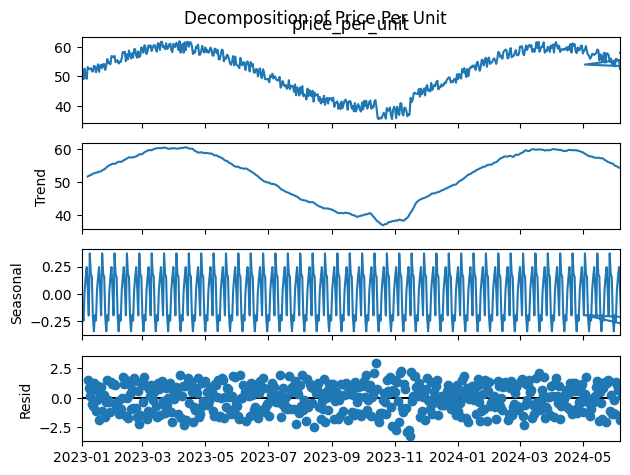

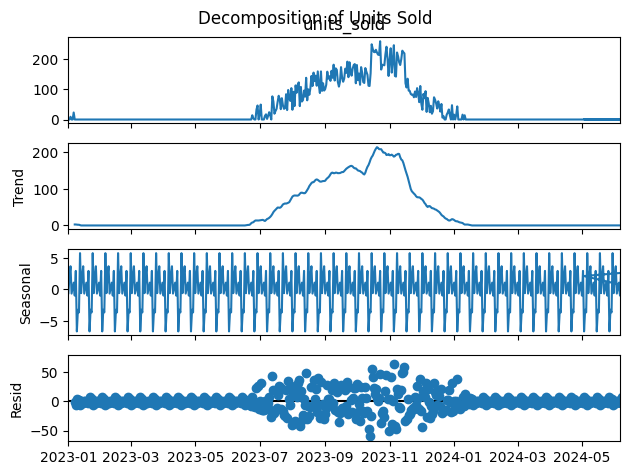

In [20]:
decomposition = seasonal_decompose(df['total_revenue'], model='additive', period=12)  
plt.suptitle('Decomposition of Total Revenue')
plt.show()

decomposition_price = seasonal_decompose(df['price_per_unit'], model='additive', period=12)
decomposition_price.plot()
plt.suptitle('Decomposition of Price Per Unit')
plt.show()


decomposition_units = seasonal_decompose(df['units_sold'], model='additive', period=12)
decomposition_units.plot()
plt.suptitle('Decomposition of Units Sold')
plt.show()


df['total_revenue_ma'] = df['total_revenue'].rolling(window=12).mean() 
df['price_per_unit_ma'] = df['price_per_unit'].rolling(window=12).mean()
df['units_sold_ma'] = df['units_sold'].rolling(window=12).mean()



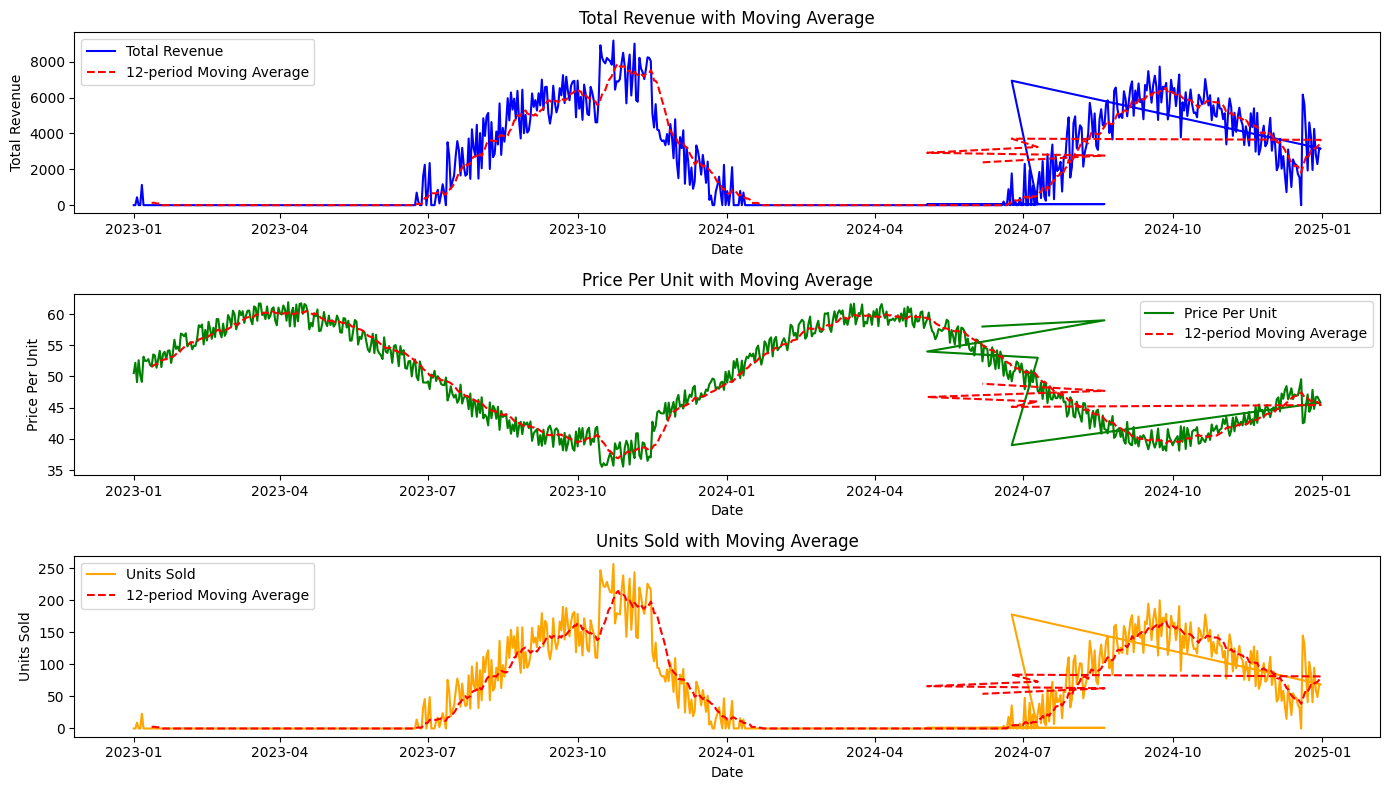

In [21]:

plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(df['total_revenue'], label='Total Revenue', color='blue')
plt.plot(df['total_revenue_ma'], label='12-period Moving Average', color='red', linestyle='--')
plt.title('Total Revenue with Moving Average')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df['price_per_unit'], label='Price Per Unit', color='green')
plt.plot(df['price_per_unit_ma'], label='12-period Moving Average', color='red', linestyle='--')
plt.title('Price Per Unit with Moving Average')
plt.xlabel('Date')
plt.ylabel('Price Per Unit')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df['units_sold'], label='Units Sold', color='orange')
plt.plot(df['units_sold_ma'], label='12-period Moving Average', color='red', linestyle='--')
plt.title('Units Sold with Moving Average')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()

plt.tight_layout()
plt.show()

# Time Series Analysis of Sales Data

This analysis focuses on understanding the trends and patterns in sales data, including total revenue, price per unit, and units sold.

**Key Observations:**

**1. Total Revenue:**

* The total revenue time series shows significant fluctuations over time.
* There are periods of high revenue followed by sharp declines.
* The 12-period moving average smoothens out these fluctuations, revealing a general downward trend in total revenue.
* There are several instances where the actual revenue deviates significantly from the moving average, suggesting potential outliers or unusual events.

**2. Price Per Unit:**

* The price per unit time series exhibits a more stable pattern compared to total revenue.
* There's a clear cyclical pattern with regular peaks and troughs, suggesting seasonality in pricing.
* The 12-period moving average captures this seasonality well, highlighting the cyclical nature of price fluctuations.

**3. Units Sold:**

* The units sold time series exhibits strong fluctuations and a high degree of volatility.
* There are periods of very high sales followed by sharp declines.
* The 12-period moving average smoothens out the fluctuations, but the overall trend is downward.
* The moving average also highlights the cyclical pattern in units sold, which appears to be closely related to the price per unit fluctuations.

**Possible Relationships:**

* **Inverse Relationship between Price and Units Sold:** The plots suggest an inverse relationship between price per unit and units sold. When the price per unit increases, units sold tend to decrease, and vice versa.
* **Impact of Price on Total Revenue:** The fluctuations in total revenue seem to be driven by a combination of price per unit and units sold. When both price and units sold are high, total revenue peaks.



In [22]:
import pandas as pd


pearson_corr = df[['total_revenue', 'price_per_unit', 'units_sold']].corr(method='pearson')
print("Pearson Correlation Matrix:")
print(pearson_corr)
spearman_corr = df[['total_revenue', 'price_per_unit', 'units_sold']].corr(method='spearman')
print("\nSpearman Correlation Matrix:")
print(spearman_corr)


Pearson Correlation Matrix:
                total_revenue  price_per_unit  units_sold
total_revenue        1.000000       -0.919993    0.996695
price_per_unit      -0.919993        1.000000   -0.906151
units_sold           0.996695       -0.906151    1.000000

Spearman Correlation Matrix:
                total_revenue  price_per_unit  units_sold
total_revenue        1.000000       -0.931263    0.999882
price_per_unit      -0.931263        1.000000   -0.932243
units_sold           0.999882       -0.932243    1.000000


### Key Observation from the Correlation Matrices:

1. **Strong Positive Relationship**:  
   total_revenue and units_sold are highly positively correlated meaning that higher sales volumes lead to higher total revenue.

2. **Strong Negative Relationship**:  
   price_per_unit and units_sold are strongly negatively correlated suggesting that as the price increases the number of units sold tends to decrease.

3. **Negative Correlation Between Price and Revenue**:  
   There’s a strong negative correlation between total_revenue and price_per_unit which suggest that when the price per unit increases the total revenue might decrease possibly due to lower sales volume.


In [23]:
df.head()

,id,price_per_unit,units_sold,total_revenue,date_diff,year,month,weekday,total_revenue_ma,price_per_unit_ma,units_sold_ma
date,,,,,,,,,,,
2023-01-01,1,50.5466,0,0.000,NaN,2023,1,6,NaN,NaN,NaN
2023-01-02,2,52.1932,0,0.000,1.0,2023,1,0,NaN,NaN,NaN
2023-01-03,3,49.0970,9,441.873,1.0,2023,1,1,NaN,NaN,NaN
2023-01-04,4,52.6075,0,0.000,1.0,2023,1,2,NaN,NaN,NaN
2023-01-05,5,50.1827,0,0.000,1.0,2023,1,3,NaN,NaN,NaN


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 736 entries, 2023-01-01 to 2024-06-06
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 736 non-null    int64  
 1   price_per_unit     736 non-null    float64
 2   units_sold         736 non-null    int64  
 3   total_revenue      736 non-null    float64
 4   date_diff          735 non-null    float64
 5   year               736 non-null    int32  
 6   month              736 non-null    int32  
 7   weekday            736 non-null    int32  
 8   total_revenue_ma   725 non-null    float64
 9   price_per_unit_ma  725 non-null    float64
 10  units_sold_ma      725 non-null    float64
dtypes: float64(6), int32(3), int64(2)
memory usage: 60.4 KB


In [25]:
selected_df = df[['id','price_per_unit', 'units_sold', 'total_revenue', 'year', 'month', 'weekday']]

print(selected_df)

             id  price_per_unit  units_sold  total_revenue  year  month  \
date                                                                      
2023-01-01    1         50.5466           0          0.000  2023      1   
2023-01-02    2         52.1932           0          0.000  2023      1   
2023-01-03    3         49.0970           9        441.873  2023      1   
2023-01-04    4         52.6075           0          0.000  2023      1   
2023-01-05    5         50.1827           0          0.000  2023      1   
...         ...             ...         ...            ...   ...    ...   
2024-06-24  732         39.0000         178       6942.000  2024      6   
2024-07-10  733         53.0000           1         53.000  2024      7   
2024-05-03  734         54.0000           1         54.000  2024      5   
2024-08-20  735         59.0000           1         59.000  2024      8   
2024-06-06  736         58.0000           1         58.000  2024      6   

            weekday  
da

In [27]:
output_file = "../csv_data/modelling_ready_sales_data.csv"
try:
    selected_df.to_csv(output_file, index=False)
    print(f"Cleaned data saved to {output_file}.")
except Exception as e:
    print(f"Error while saving data: {e}")


Cleaned data saved to ../csv_data/modelling_ready_sales_data.csv.
